In [1]:
import pymatviz as pmv

In [2]:
from pymatgen.core.periodic_table import Element
all_symbols = set([el.symbol for el in Element])

In [3]:
from pymatgen.analysis.cost import CostDBElements, CostAnalyzer

ca = CostAnalyzer(CostDBElements())

costs_per_kg = {}
costs_per_mol = {}

for symbol in all_symbols:
    try:
        costs_per_kg[symbol] = ca.get_cost_per_kg(symbol)
        costs_per_mol[symbol] = ca.get_cost_per_mol(symbol)
    except:
        pass

del costs_per_kg["Ne"]  # out of bounds
del costs_per_mol["Ne"]  # out of bounds
del costs_per_kg["Pa"]  # out of bounds
del costs_per_mol["Pa"]  # out of bounds

/Users/ajain/Documents/code_venvs/pmg_tutorials/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:267: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/ajain/Documents/code_venvs/pmg_tutorials/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:267: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
/Users/ajain/Documents/code_venvs/pmg_tutorials/lib/python3.11/site-packages/pymatgen/core/periodic_table.py:267: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(


In [4]:
from pymatgen.analysis.hhi import HHIModel

hhim = HHIModel()

hhis_production = {}
hhis_reserve = {}

for symbol in all_symbols:
    try:
        hhis_production[symbol] = hhim.get_hhi_production(symbol)
        hhis_reserve[symbol] = hhim.get_hhi_reserve(symbol)
    except:
        pass

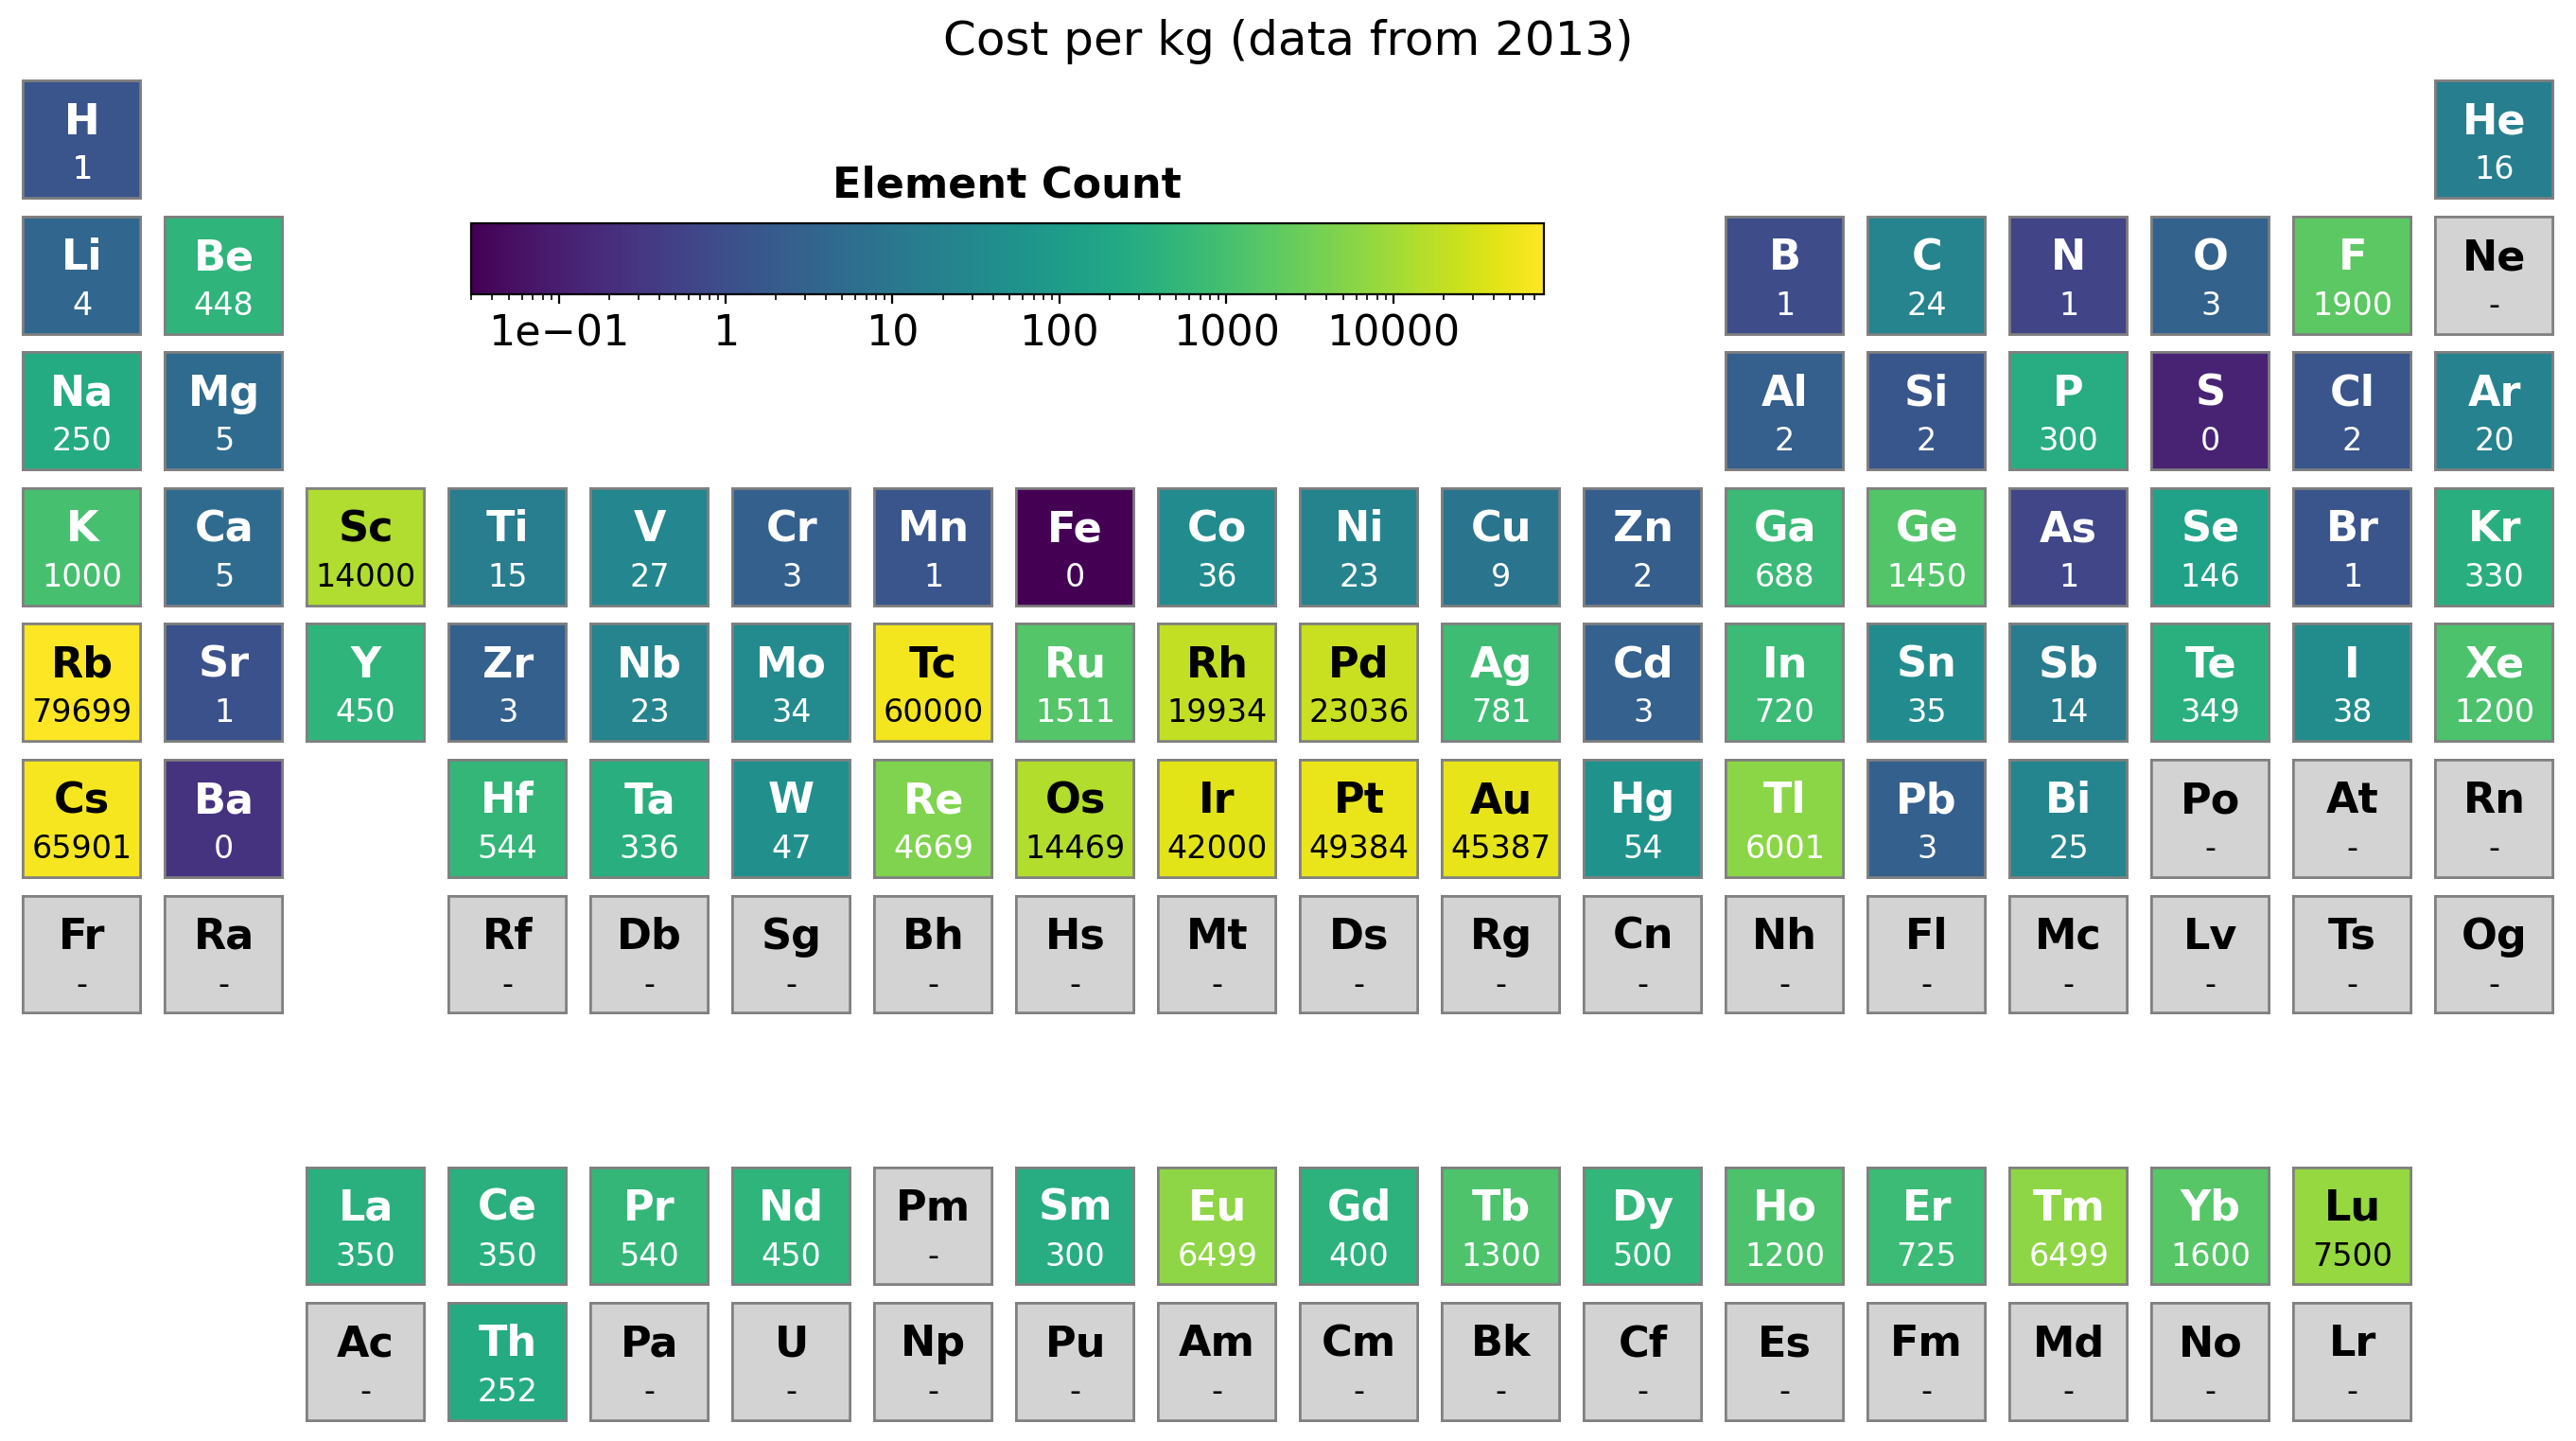

In [9]:
fig = pmv.ptable_heatmap(costs_per_kg, log=True, return_type="figure")
fig.suptitle("Cost per kg (data from 2013)")
fig.savefig("cost_per_kg.png")


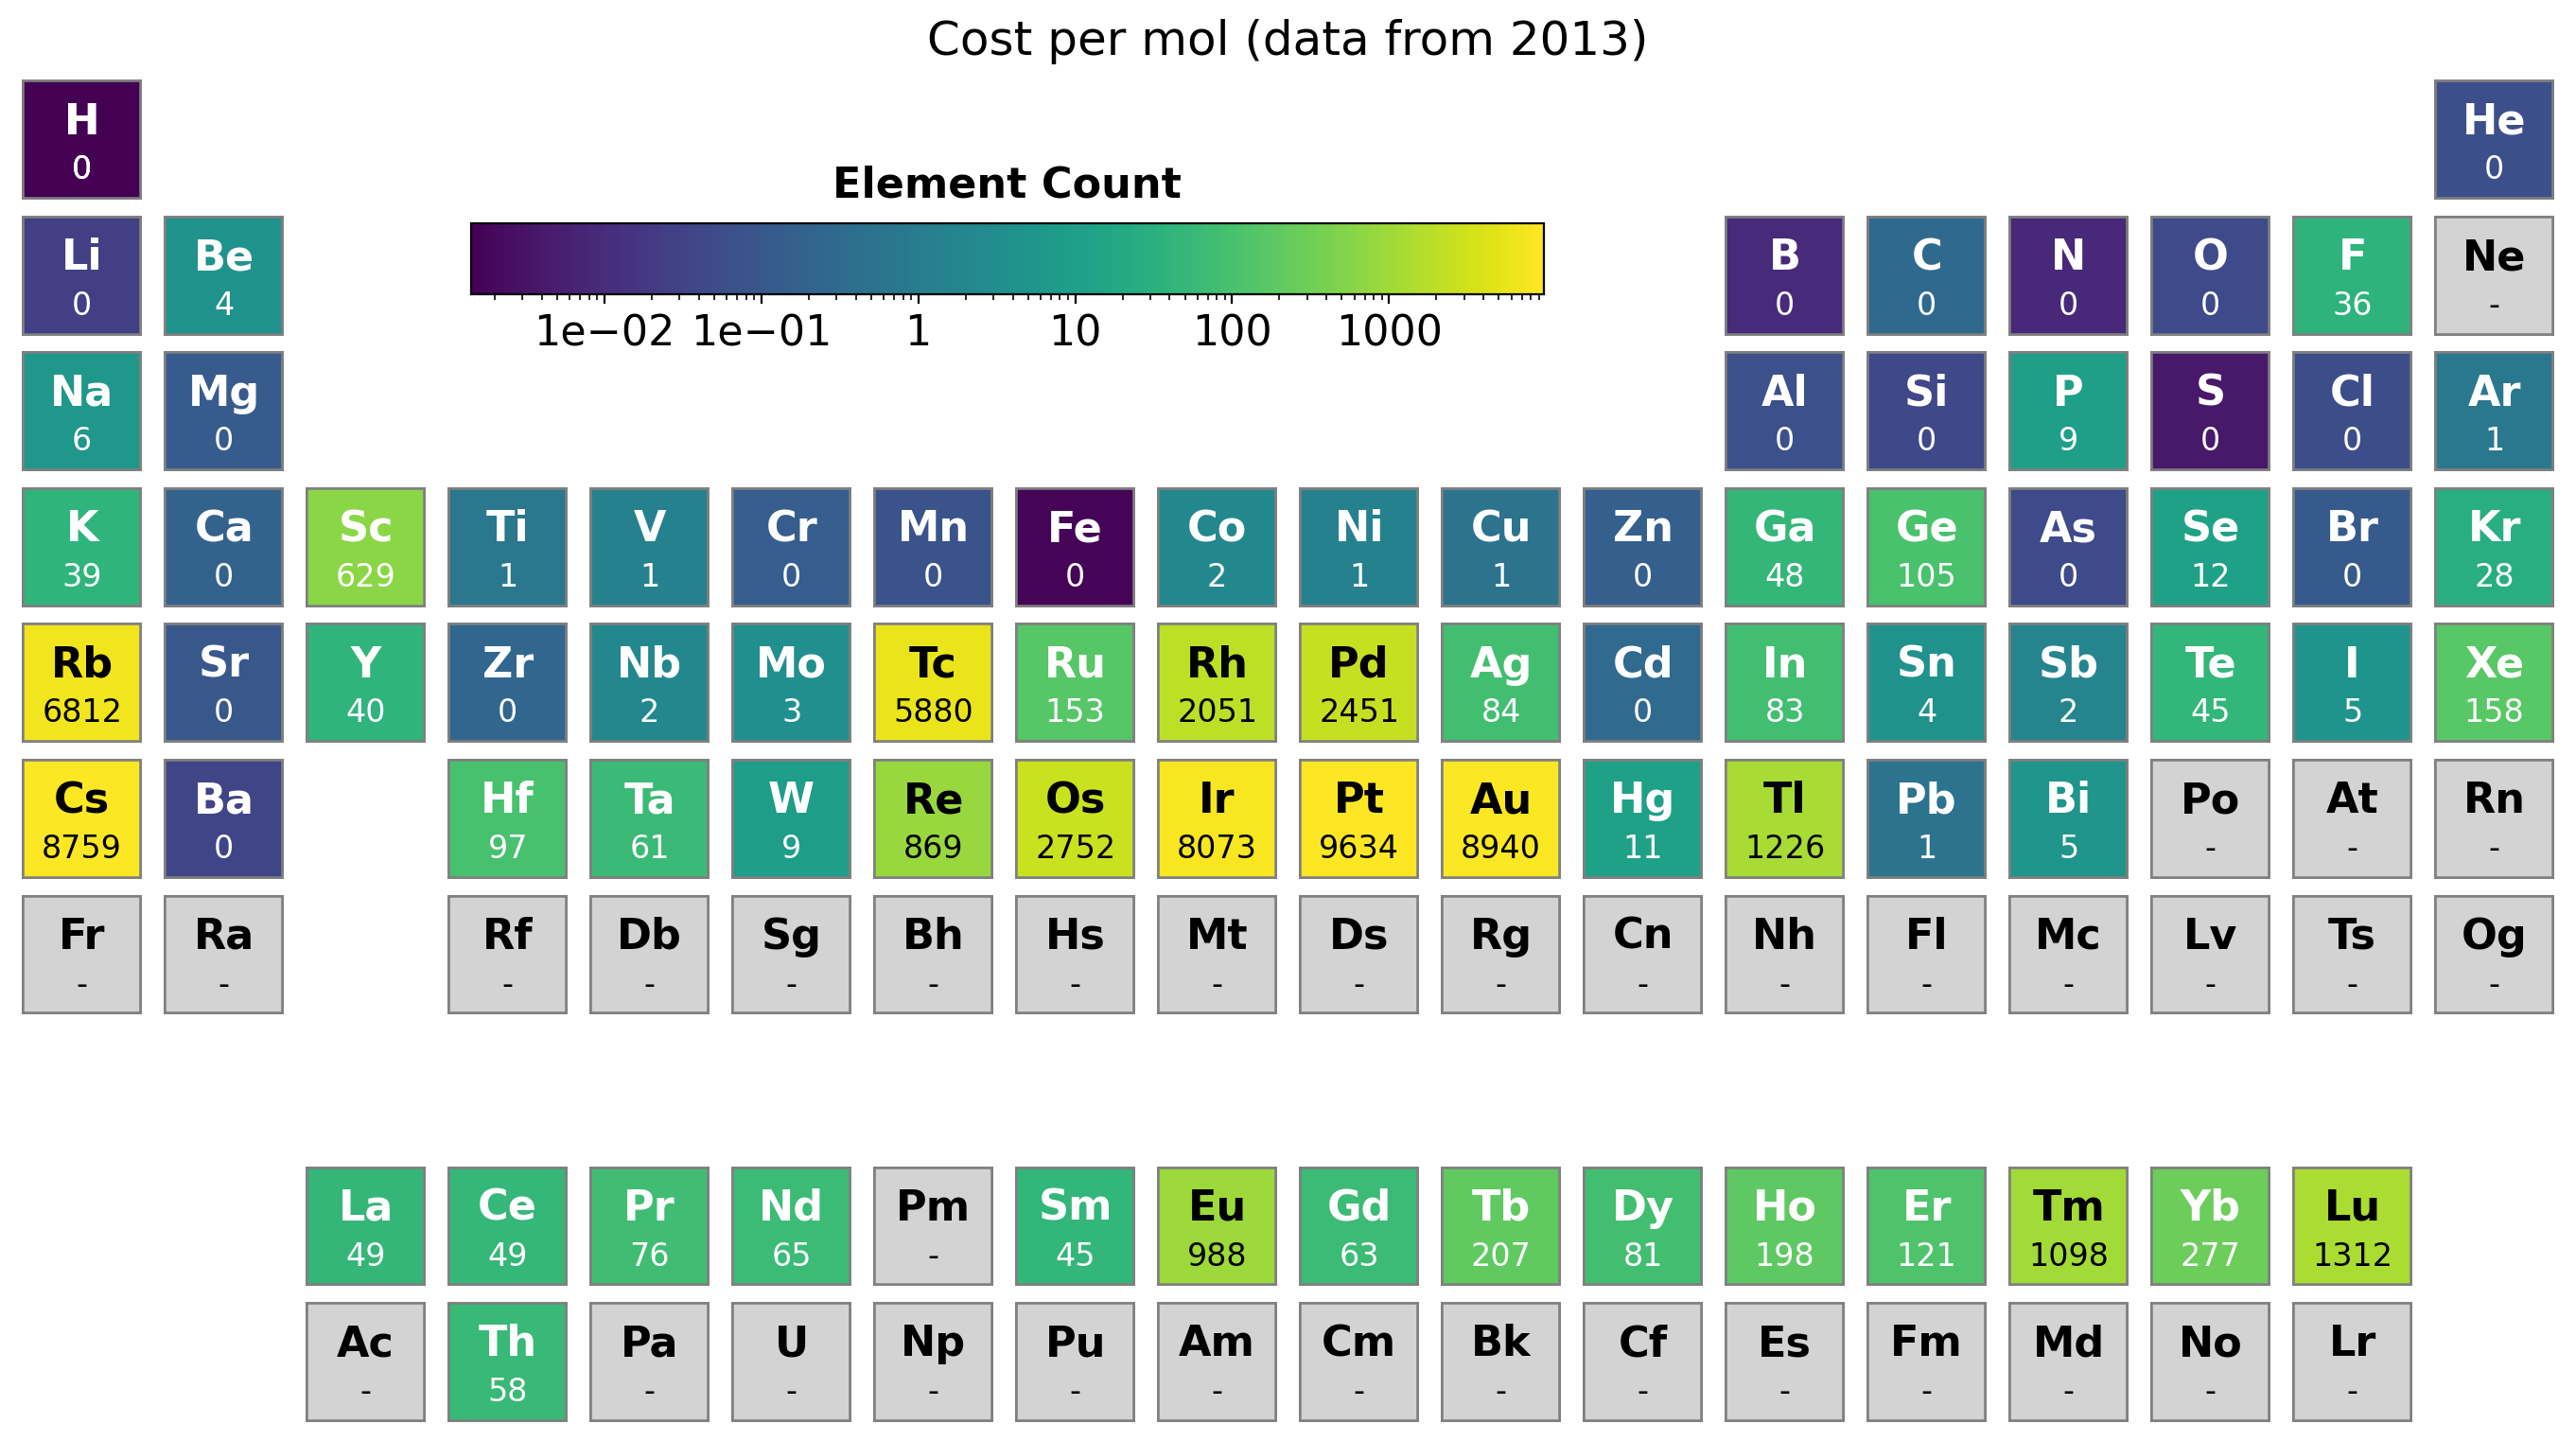

In [10]:
fig = pmv.ptable_heatmap(costs_per_mol, log=True, return_type="figure")
fig.suptitle("Cost per mol (data from 2013)")
fig.savefig("cost_per_mol.png")

/Users/ajain/Documents/code_venvs/pmg_tutorials/lib/python3.11/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


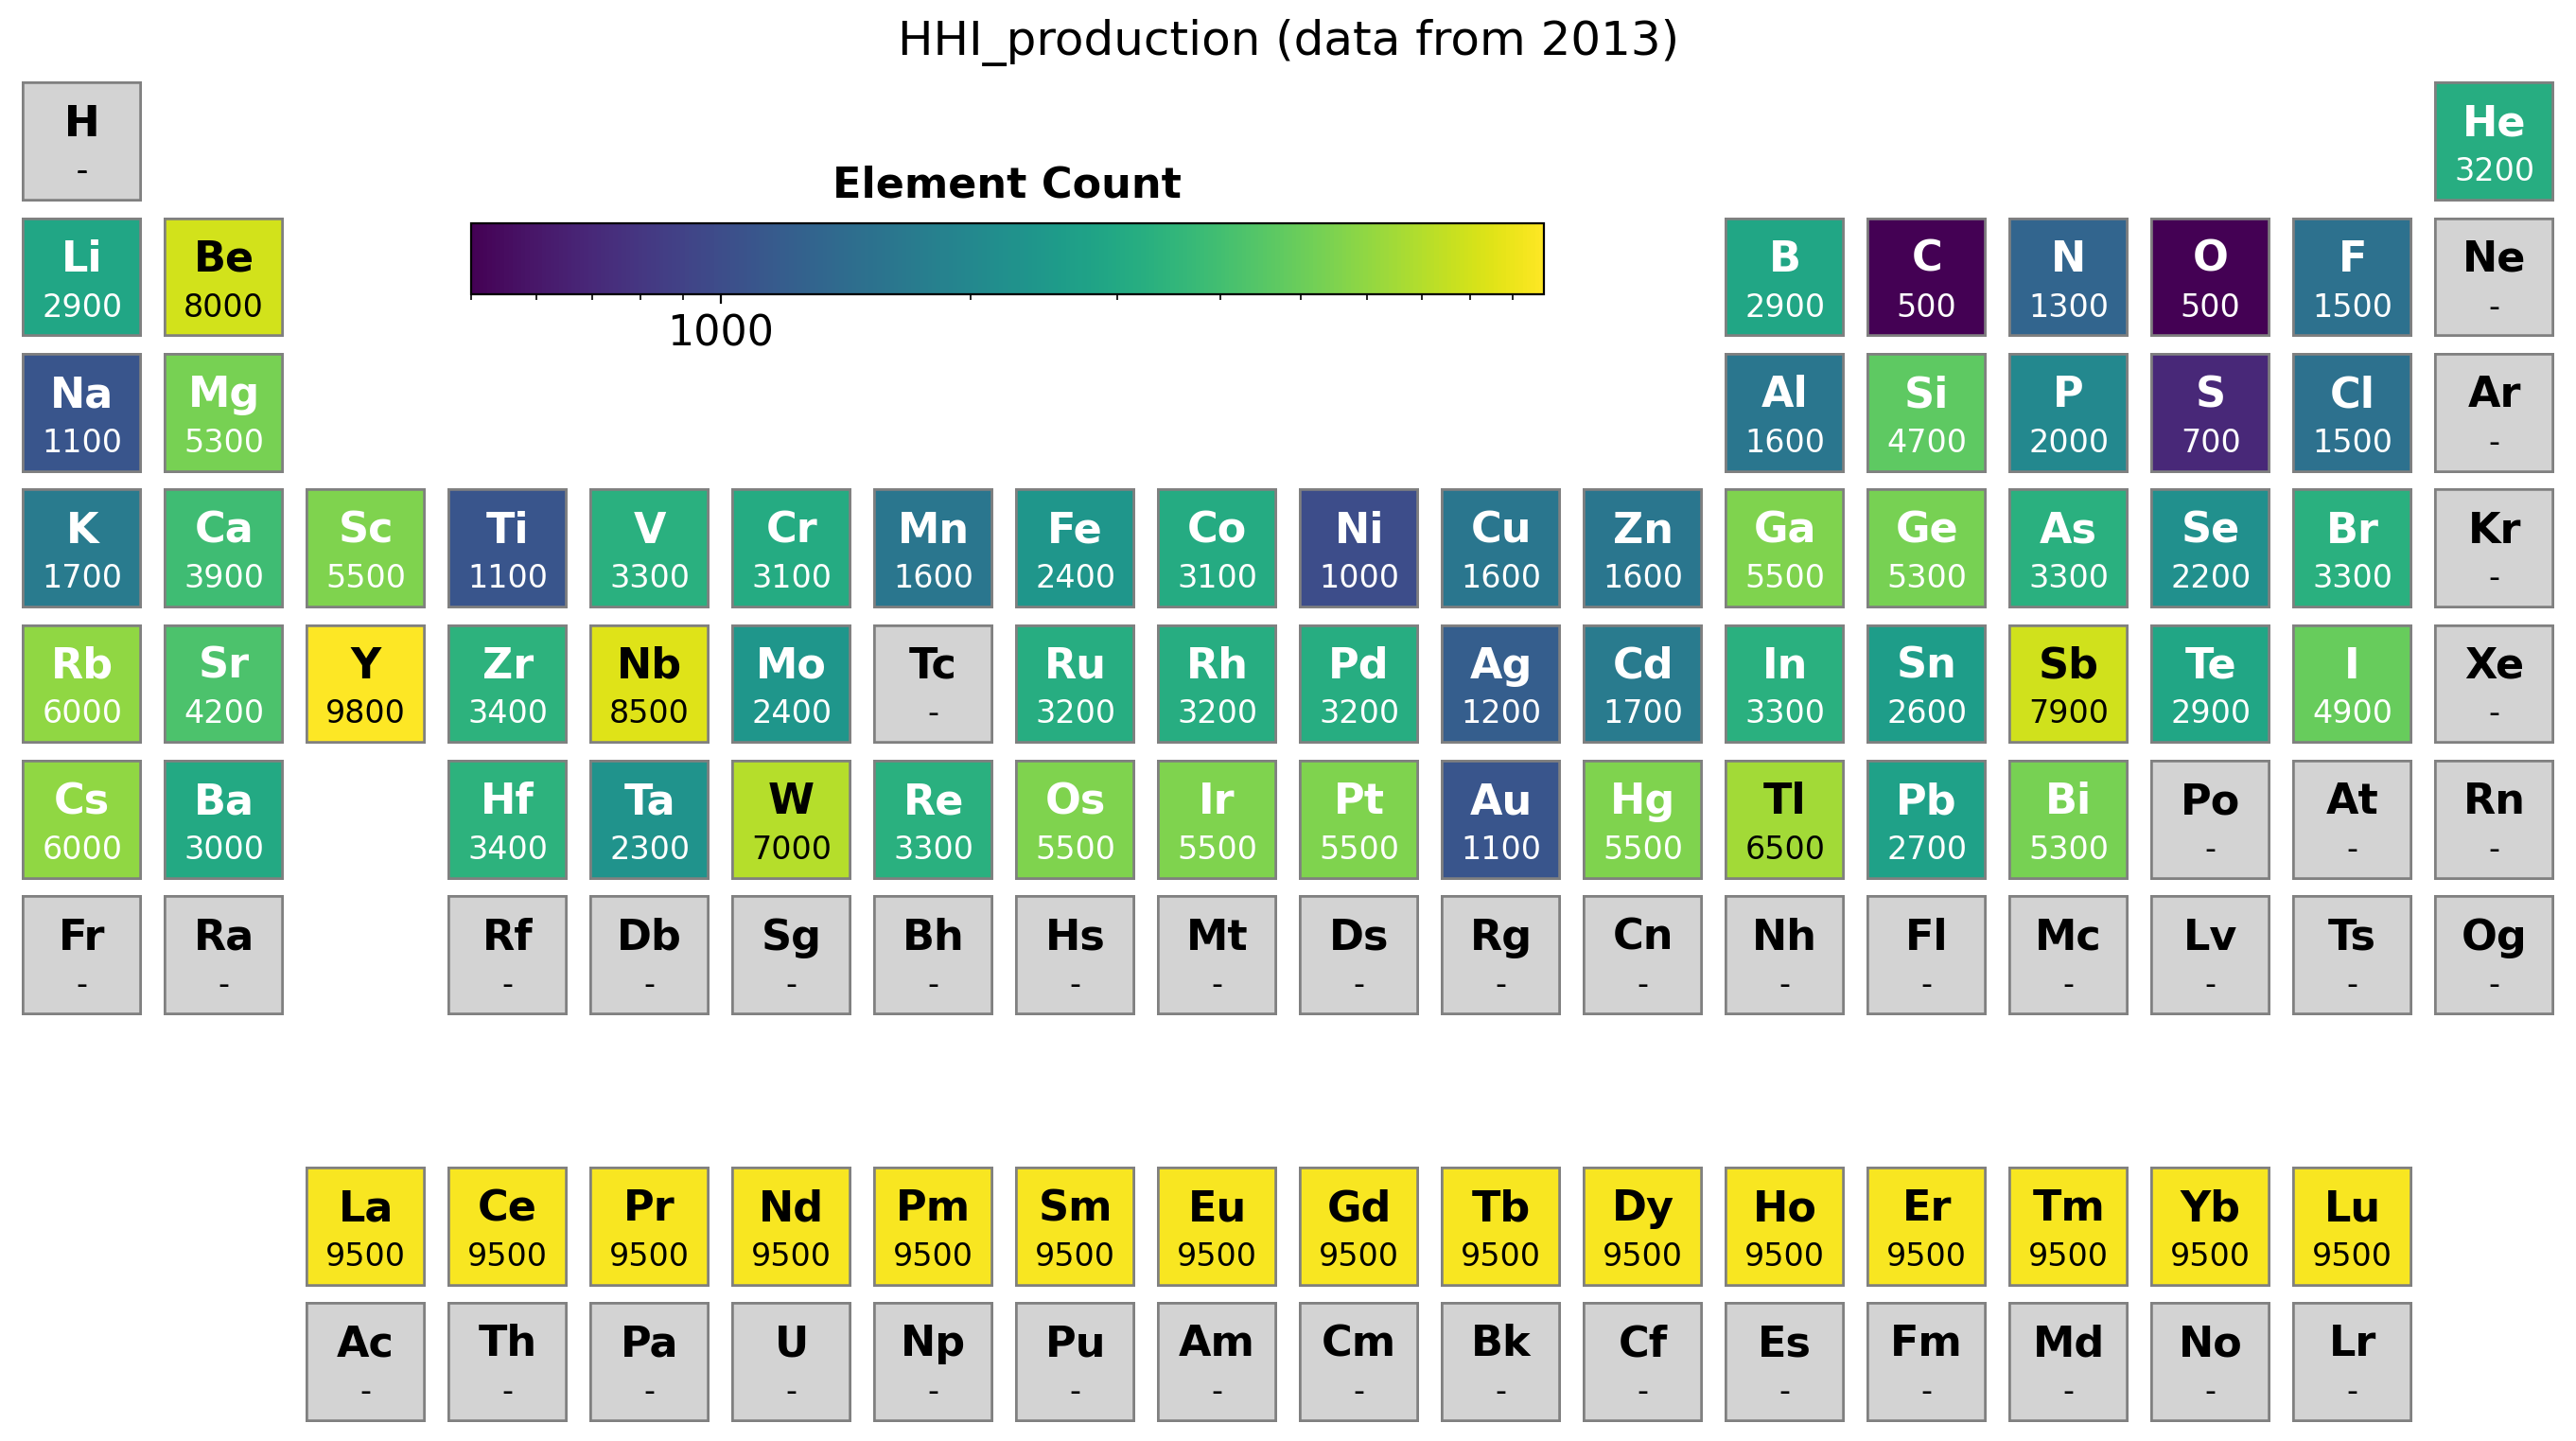

In [11]:
fig = pmv.ptable_heatmap(hhis_production, log=True, return_type="figure")
fig.suptitle("HHI_production (data from 2013)")
fig.savefig("hhi_production.png")

/Users/ajain/Documents/code_venvs/pmg_tutorials/lib/python3.11/site-packages/pymatviz/ptable/_process_data.py:117: UserWarning: NaN found in data
  self.check_and_replace_missing(strategy=missing_strategy)


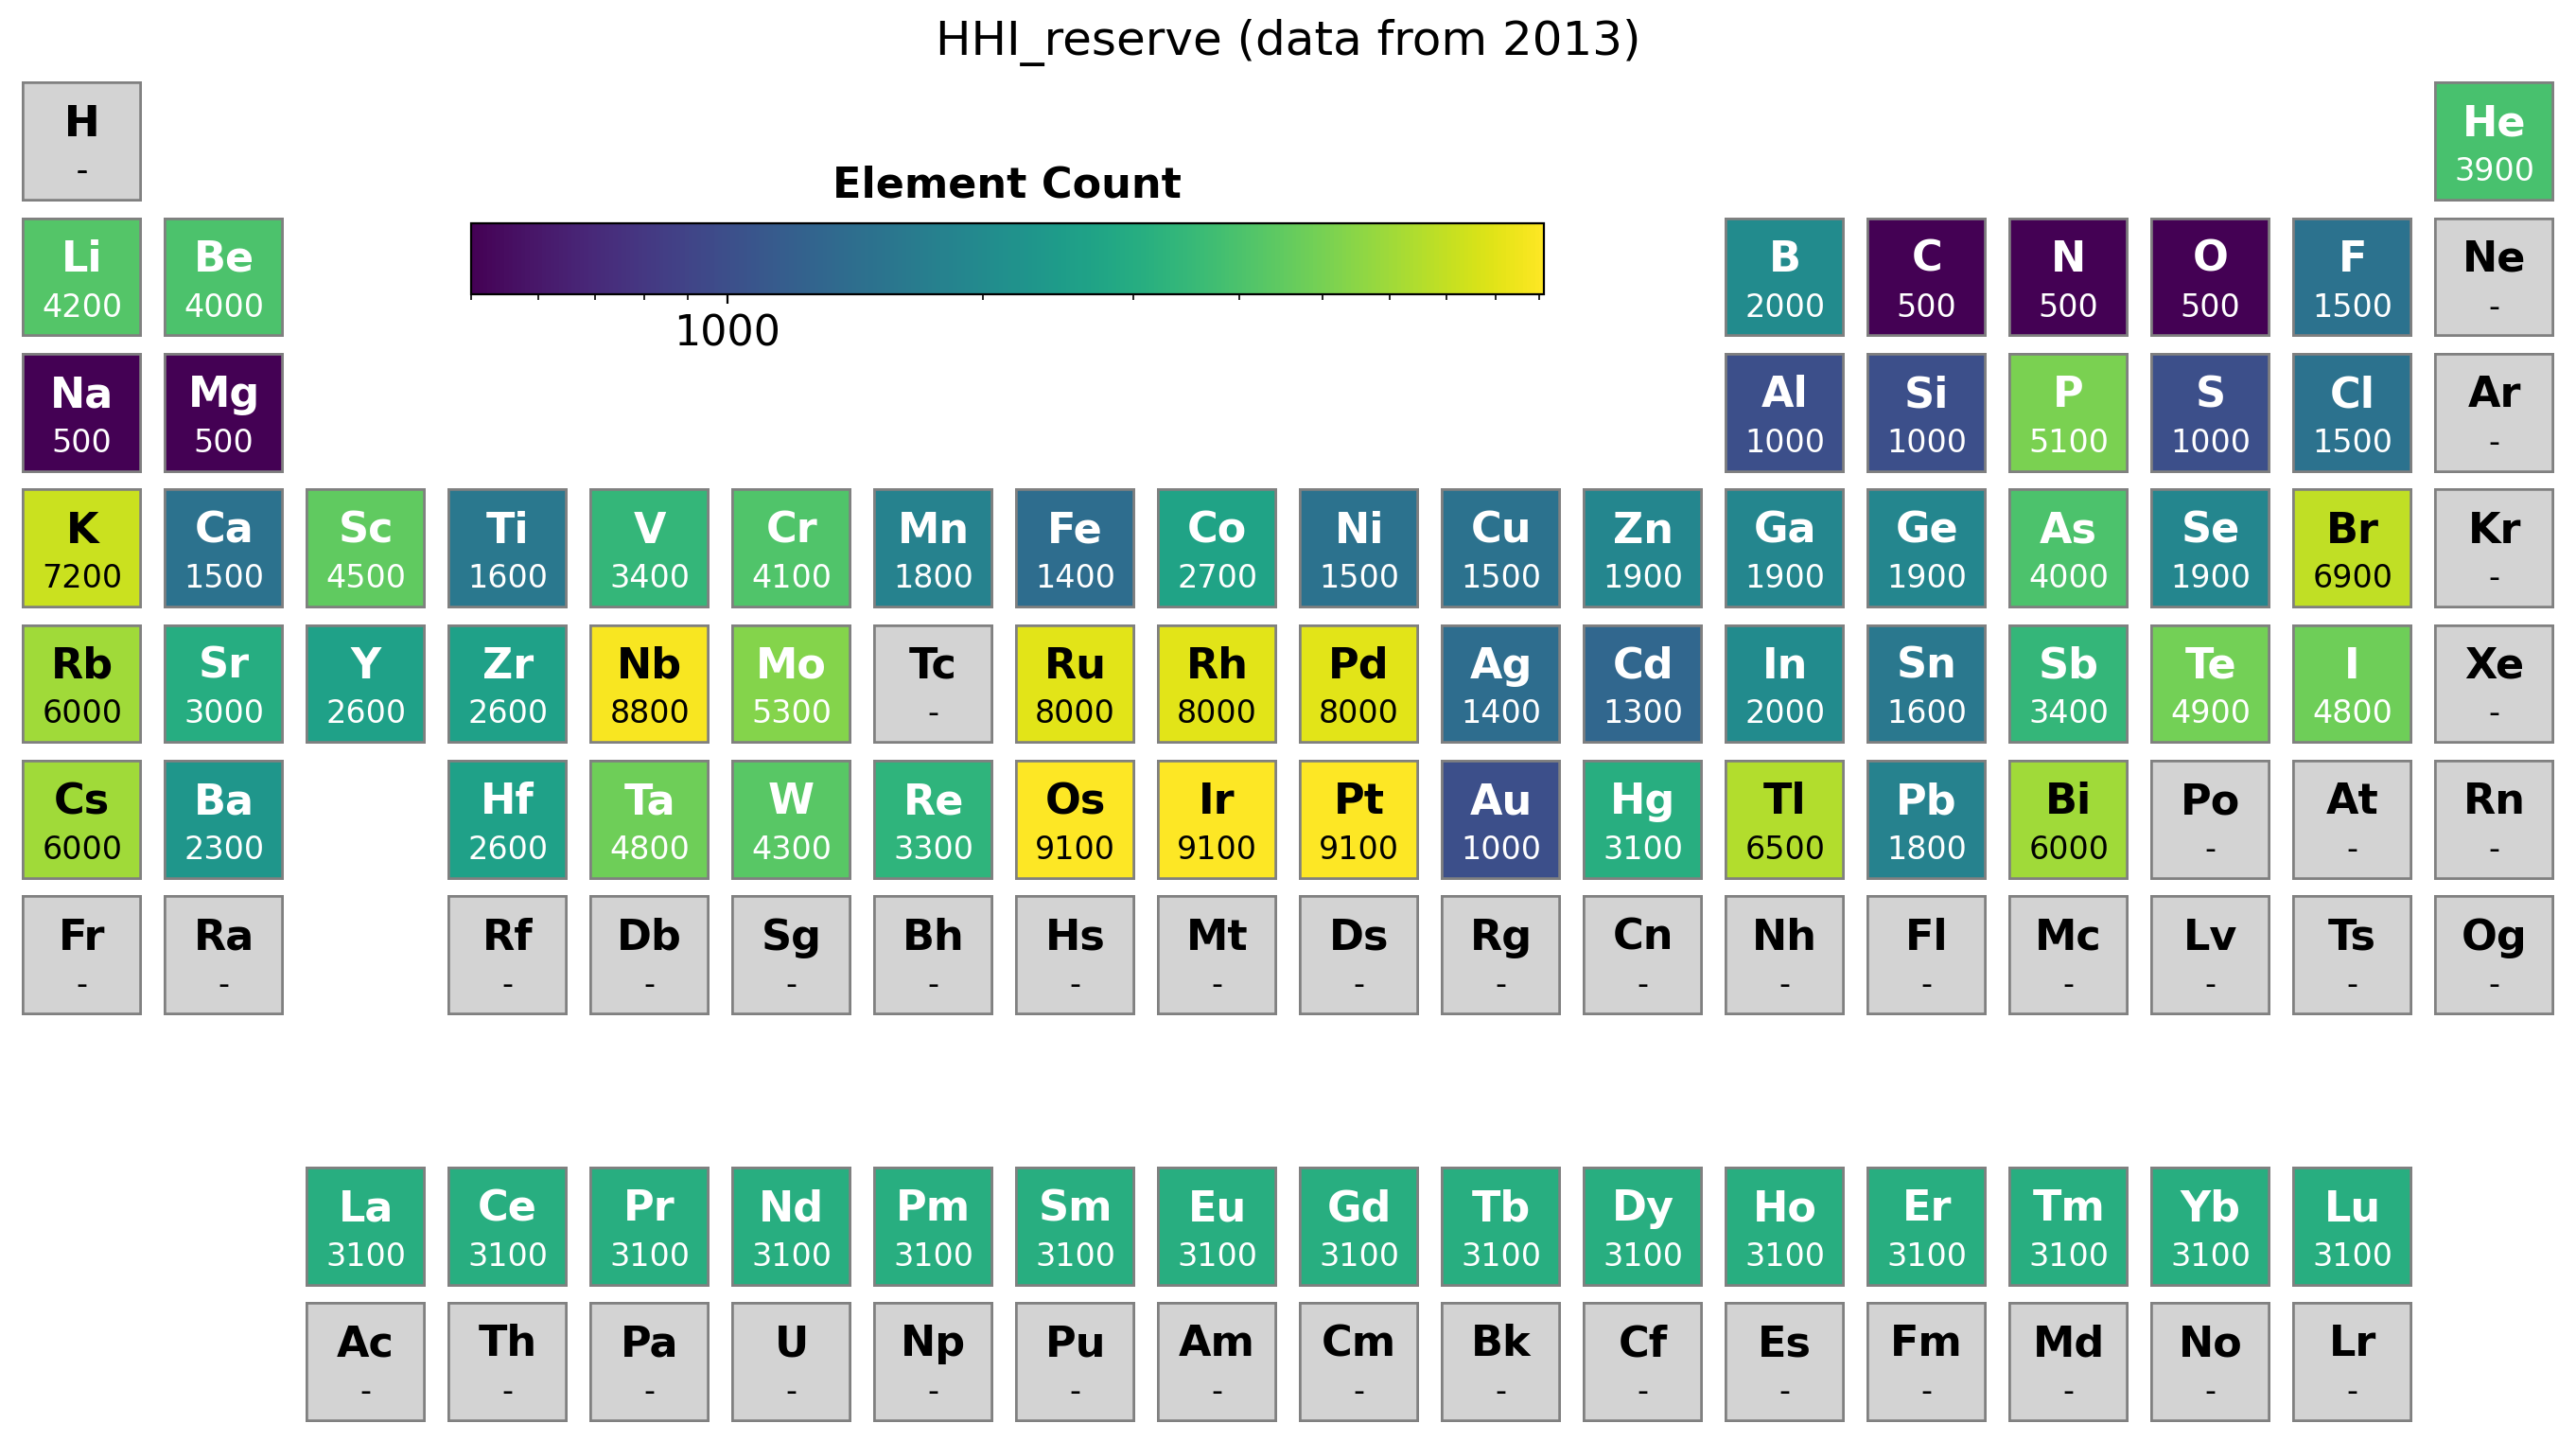

In [13]:
fig = pmv.ptable_heatmap(hhis_reserve, log=True, return_type="figure")
fig.suptitle("HHI_reserve (data from 2013)")
fig.savefig("hhi_reserve.png")

In [15]:
import numpy as np
rng = np.random.default_rng(seed=0)
n_splits=2
data_dict = {
    elem.symbol: rng.integers(10 * n_splits, 20 * (n_splits + 1), size=n_splits)
    for elem in Element
}
print(data_dict)


SyntaxError: incomplete input (3878295065.py, line 1)

In [20]:
all_costs = {}
for symbol in costs_per_kg.keys():
    all_costs[symbol] = [costs_per_kg[symbol], costs_per_mol[symbol]]

In [22]:
fig = pmv.ptable_heatmap_splits(
    data=all_costs,
    colormap="coolwarm",
    start_angle=135,
    cbar_title="Periodic Table Evenly-Split Heatmap Plots",
    hide_f_block=False,
    log=True
)
fig.show()

TypeError: ptable_heatmap_splits() got an unexpected keyword argument 'log'